In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import linalg as la

In [ ]:
#Q1

In [2]:
x=[2,3,5,7,9]
y=[1,4,0,6,2]

In [3]:
a=pd.DataFrame({'x':[2,3,5,7,9],
                'y':[1,4,0,6,2]})
a

,x,y
0,2,1
1,3,4
2,5,0
3,7,6
4,9,2


In [4]:
x_mean=np.mean(x)
y_mean=np.mean(y)
print(x_mean)
print(y_mean)

5.2
2.6


In [5]:
xs=x-x_mean
ys=y-y_mean
print(xs)
print(ys)

[-3.2 -2.2 -0.2  1.8  3.8]
[-1.6  1.4 -2.6  3.4 -0.6]


In [6]:
b=pd.DataFrame({'x_standardised':xs,
               'y_standardised':ys})
b

,x_standardised,y_standardised
0,-3.2,-1.6
1,-2.2,1.4
2,-0.2,-2.6
3,1.8,3.4
4,3.8,-0.6


In [7]:

print("\nStandarised values of x and y =\n",b)
covariance = np.cov(x, y)
print("\nCovariance matrix = \n",covariance)


Standarised values of x and y =
    x_standardised  y_standardised
0            -3.2            -1.6
1            -2.2             1.4
2            -0.2            -2.6
3             1.8             3.4
4             3.8            -0.6

Covariance matrix = 
 [[8.2 1.6]
 [1.6 5.8]]


In [8]:
from numpy import linalg as la #importing linalg to get eigen values and vectors
eigh_vals, eigh_vects = la.eig(covariance)
print('\nEigen_values=', eigh_vals)
print('\nEigen_vectors=\n', eigh_vects)



Eigen_values= [9. 5.]

Eigen_vectors=
 [[ 0.89442719 -0.4472136 ]
 [ 0.4472136   0.89442719]]


In [9]:
yc_trans=np.concatenate((xs,ys),axis=0)
yc_trans=np.reshape(yc_trans,(2,5))
yc=np.transpose(yc_trans)
print(yc)

[[-3.2 -1.6]
 [-2.2  1.4]
 [-0.2 -2.6]
 [ 1.8  3.4]
 [ 3.8 -0.6]]


In [10]:
final=np.matmul(yc,eigh_vects)
print("\nFinal answer =\n",final)


Final answer =
 [[-3.57770876e+00 -2.22044605e-16]
 [-1.34164079e+00  2.23606798e+00]
 [-1.34164079e+00 -2.23606798e+00]
 [ 3.13049517e+00  2.23606798e+00]
 [ 3.13049517e+00 -2.23606798e+00]]


In [19]:
x = [[2, 1],[3, 4], [5, 0], [7, 6], [9, 2]]
sum_x = 0
sum_y = 0
for i in x:
    sum_x += i[0]
    sum_y += i[1]
sum_x/=5
sum_y/=5
for i in x:
    i[0] -= sum_x
    i[1] -= sum_y
r = np.array(x)
print("\noriginal matrix:", r)
c = 0.25*np.dot(np.transpose(r),r)
print("\ncovariance matrix :", c)
values,vectors = np.linalg.eig(c)
print("\neigen_vectors:",vectors)
pca = np.dot(r,vectors)
print("\nPCA:",pca)


original matrix: [[-3.2 -1.6]
 [-2.2  1.4]
 [-0.2 -2.6]
 [ 1.8  3.4]
 [ 3.8 -0.6]]

covariance matrix : [[8.2 1.6]
 [1.6 5.8]]

eigen_vectors: [[ 0.89442719 -0.4472136 ]
 [ 0.4472136   0.89442719]]

PCA: [[-3.57770876e+00 -2.57076777e-16]
 [-1.34164079e+00  2.23606798e+00]
 [-1.34164079e+00 -2.23606798e+00]
 [ 3.13049517e+00  2.23606798e+00]
 [ 3.13049517e+00 -2.23606798e+00]]


Scatter Plot for the actual Data : 
[-3.2, -2.2, -0.20000000000000018, 1.7999999999999998, 3.8]
[-1.6, 1.4, -2.6, 3.4, -0.6000000000000001]


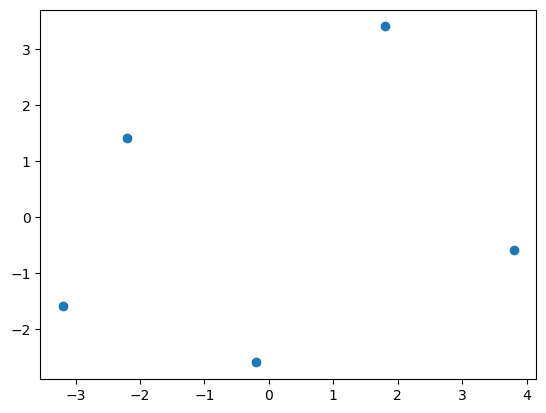

Scatter Plot for the Transformed Data : 
[-3.5777087639996634, -1.341640786499874, -1.3416407864998738, 3.130495168499705, 3.1304951684997055]
[-2.220446049250313e-16, 2.2360679774997894, -2.23606797749979, 2.23606797749979, -2.2360679774997894]


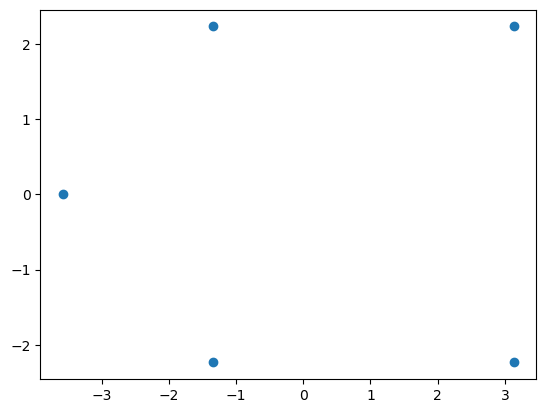

In [13]:
def scatter_plot(list):
    x = []
    y = []
    for i in list:
        x.append(i[0])
        y.append(i[1])
    print(x)
    print(y)
    plt.scatter(x,y)
    plt.show()
print("Scatter Plot for the actual Data : ")
scatter_plot(x)
print("Scatter Plot for the Transformed Data : ")
scatter_plot(final)

In [20]:
#Q2

In [21]:
from sklearn import datasets
iris = datasets.load_iris()

In [22]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['species'])

df.describe()#describe function gives statical measurements for every column 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


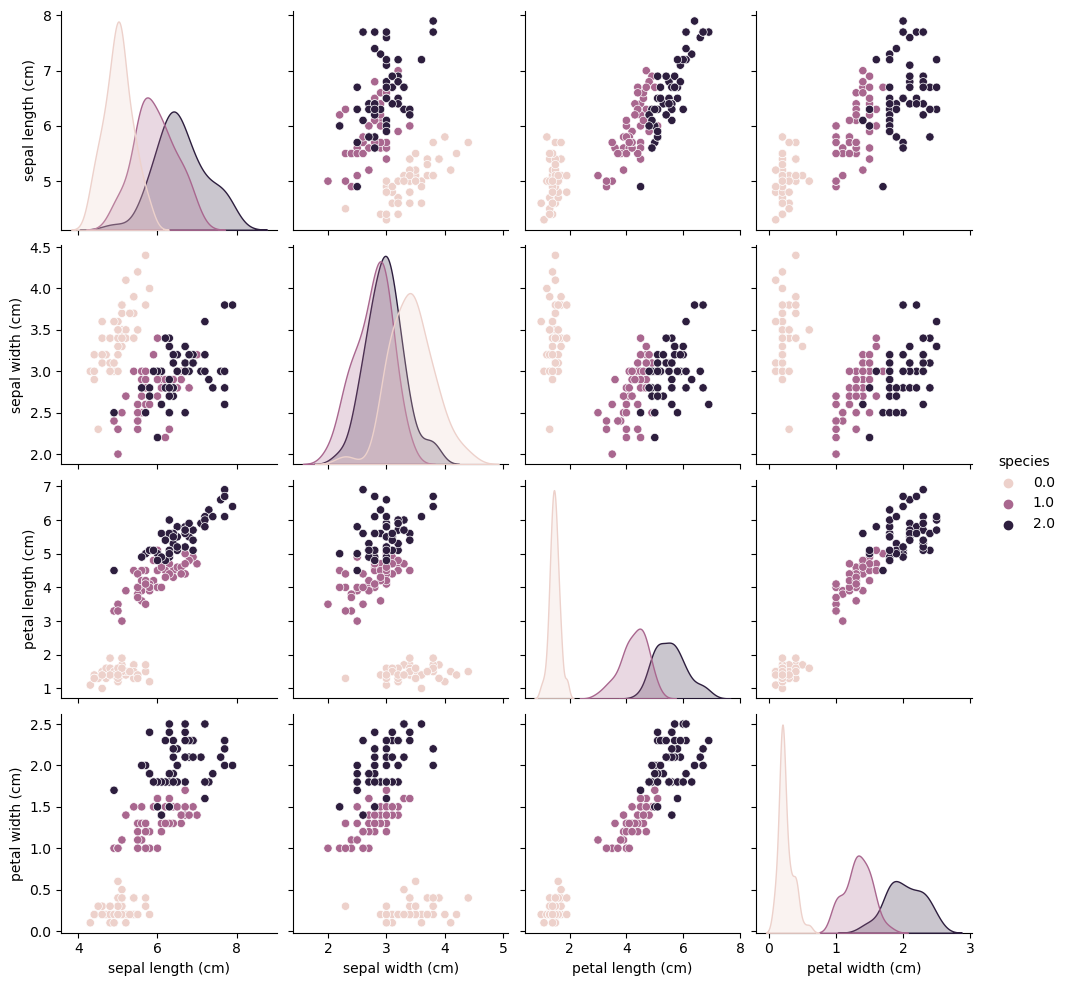

In [24]:
import seaborn as sns
sns.pairplot(df, hue = 'species') #gives the plots or relationship between the variables 

In [42]:
species = df["species"].tolist()
X = df.drop(["species"], axis=1)
X.head()
print(X.mean())

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64


In [43]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [44]:
print(X - X.mean())

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0            -0.743333          0.442667             -2.358         -0.999333
1            -0.943333         -0.057333             -2.358         -0.999333
2            -1.143333          0.142667             -2.458         -0.999333
3            -1.243333          0.042667             -2.258         -0.999333
4            -0.843333          0.542667             -2.358         -0.999333
..                 ...               ...                ...               ...
145           0.856667         -0.057333              1.442          1.100667
146           0.456667         -0.557333              1.242          0.700667
147           0.656667         -0.057333              1.442          0.800667
148           0.356667          0.342667              1.642          1.100667
149           0.056667         -0.057333              1.342          0.600667

[150 rows x 4 columns]


In [45]:
print(X.std(ddof=0))

sepal length (cm)    0.825301
sepal width (cm)     0.434411
petal length (cm)    1.759404
petal width (cm)     0.759693
dtype: float64


In [41]:

X = (X - X.mean()) / X.std(ddof=0)


X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [29]:
X_corr = (1 / 150) * X.T.dot(X)
X_corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


Text(0.5, 1.0, 'Correlation matrix')

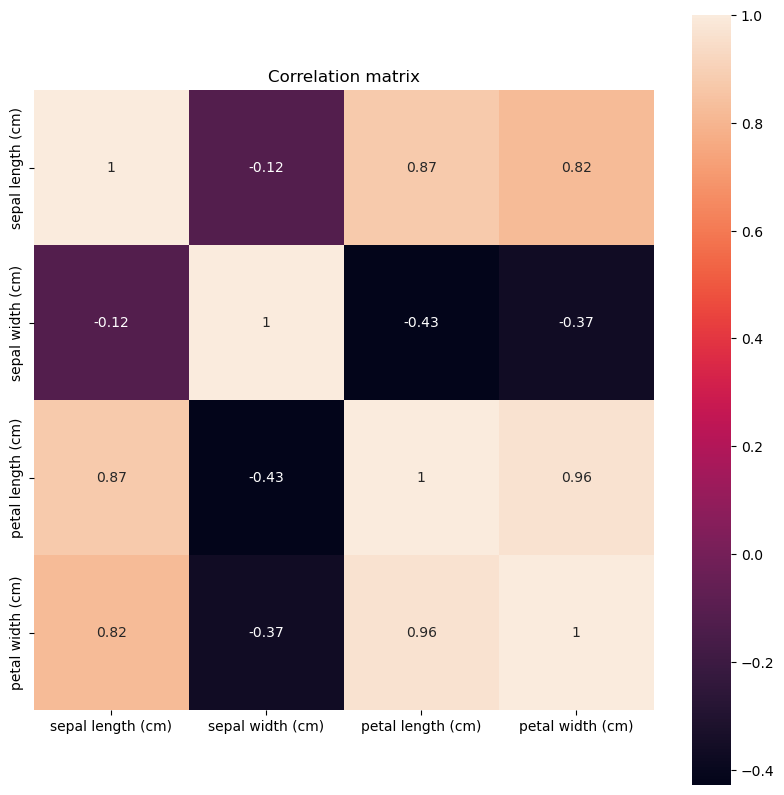

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(X_corr, vmax=1, square=True,annot=True)
plt.title('Correlation matrix')

In [31]:
u,s,v = np.linalg.svd(X_corr)
eig_values, eig_vectors = s, u
eig_values, eig_vectors

(array([2.91849782, 0.91403047, 0.14675688, 0.02071484]),
 array([[-0.52106591, -0.37741762,  0.71956635,  0.26128628],
        [ 0.26934744, -0.92329566, -0.24438178, -0.12350962],
        [-0.5804131 , -0.02449161, -0.14212637, -0.80144925],
        [-0.56485654, -0.06694199, -0.63427274,  0.52359713]]))

In [32]:
pc1 = X.dot(eig_vectors[:,0])
pc2 = X.dot(eig_vectors[:,1])
pc1

0      2.264703
1      2.080961
2      2.364229
3      2.299384
4      2.389842
         ...   
145   -1.870503
146   -1.564580
147   -1.521170
148   -1.372788
149   -0.960656
Length: 150, dtype: float64

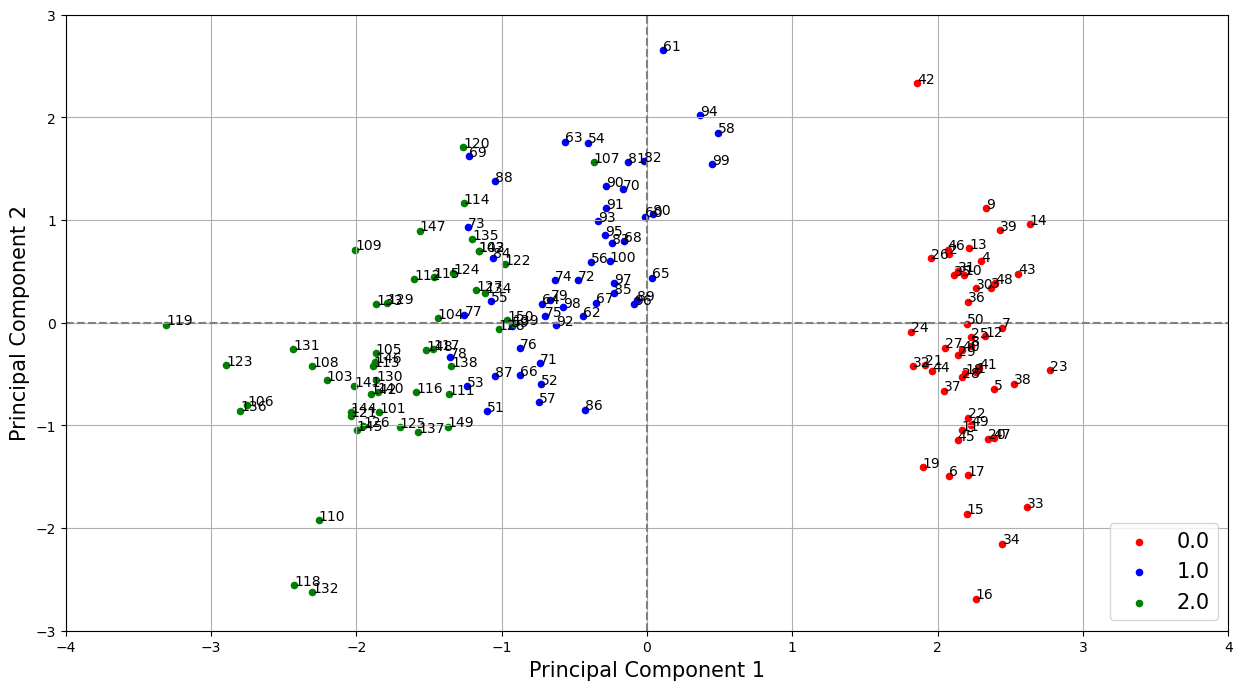

In [34]:
def plot_scatter(pc1, pc2):

    fig, ax = plt.subplots(figsize=(15, 8))
    species_unique = list(set(species))
    species_colors = ["r","b","g"]
    for i, spec in enumerate(species):
        plt.scatter(pc1[i], pc2[i], label = spec, s = 20, c=species_colors[species_unique.index(spec)])
        ax.annotate(str(i+1), (pc1[i],pc2[i]))
    from collections import OrderedDict
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), prop={'size': 15}, loc=4)
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")
    plt.grid()
    plt.axis([-4, 4, -3, 3])
    plt.show()
plot_scatter(pc1, pc2)